<font color=red>Sum和Diag对学习率的耐受分别依赖于：max(1/min(correction_vector))和max(1/min(Diag(W)))</font>

In [1]:
import torch
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *

A的第二大特征值: 0.7504402479270939
A的beta: 0.9045798039879072
A的spectral gap: 0.09542019601209284
A的kappa: 2.2184988546351607
S_A是: 99.64279217348574 

B的第二大特征值: 0.7496089653271623
B的beta: 0.9043350250981569
B的spectral gap: 0.09566497490184311
B的kappa: 2.2181546416444133
S_B是: 99.37925242814778 



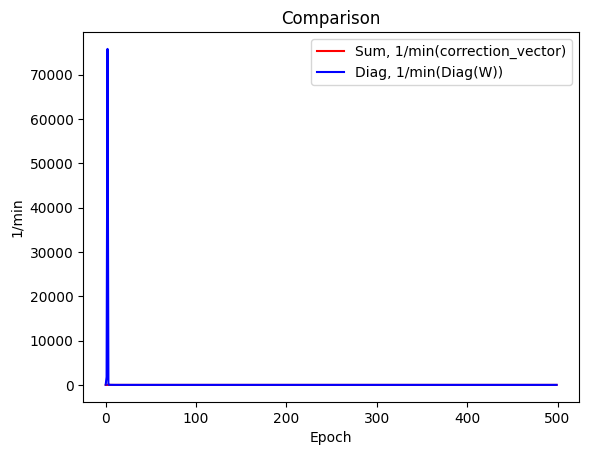

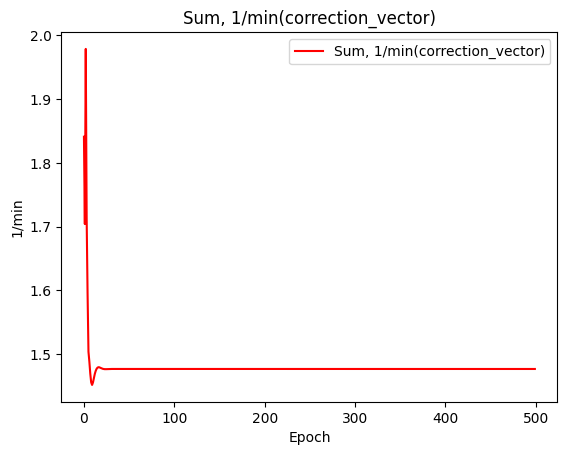

1.978787069734362   75790.80287013698


In [37]:
n=7
d=784
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=120228).T #92,241,3287,11762,30667,47191，120228
#A=0.95*A+0.05*I
B=get_B(A=A,u=2*n,n=n)
show_row(A)
show_col(B)
epochs=500
_,__=test_row(A=A,epochs=epochs,if_plot=True)
print(_,' ',__)

In [23]:
index,value=0,10
for i in tqdm(range(100000,150000), desc="Training Progress"):
    A=get_xinmeng_like_matrix(n,seed=i).T
    epochs=500
    _,__=test_row(A=A,epochs=50,if_plot=False)
    if __ > value and _ < 2:
        index,value=i,__
print(index,value)

Training Progress: 100%|██████████| 50000/50000 [00:21<00:00, 2361.63it/s]

120228 75790.80287013698


<font color=blue>也就是说，可以选取随机种子，来让Sum的metric很小，从而可以有较大的学习率；让Diag的metric很大，必须要很小的学习率</font>

<font color=blue>如下所示，此时Sum的最大学习率大概是0.15，再大一点就不是很稳定了</font>

Training Progress: 100%|██████████| 500/500 [01:13<00:00,  6.81it/s, accuracy=97.5397973951%, epoch=500, loss=0.0699791520]


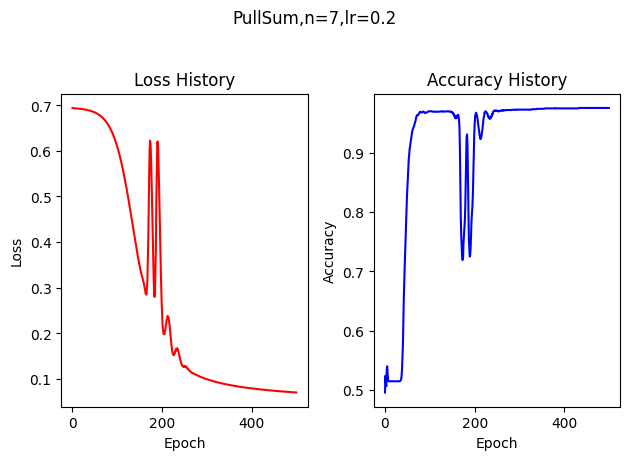

In [39]:
l3,a3=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.2/n))

Training Progress: 100%|██████████| 500/500 [01:13<00:00,  6.84it/s, accuracy=97.4674384949%, epoch=500, loss=0.0806613682]


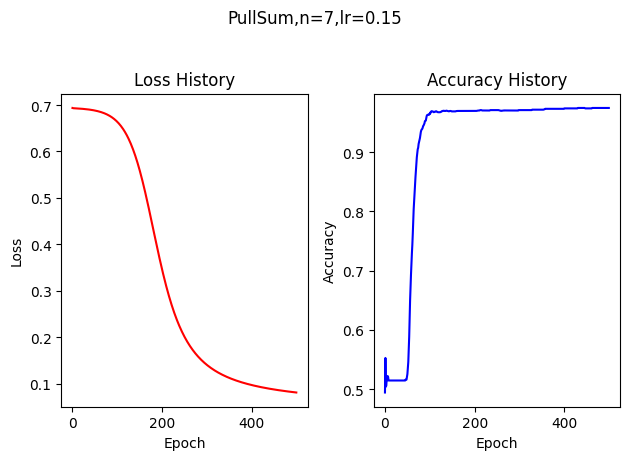

In [40]:
l4,a4=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.15/n))

<font color=blue>下面看看Diag所允许的最大学习率</font>

<font color=blue>首先是 Sum 的最大学习率 lr=0.15，因为Sum有n倍补偿，这里先看0.15/n</font>，<font color=red>可以看到，Diag还是不稳定很多</font>

Training Progress: 100%|██████████| 500/500 [01:12<00:00,  6.88it/s, accuracy=97.6121562952%, epoch=500, loss=0.0835870664]


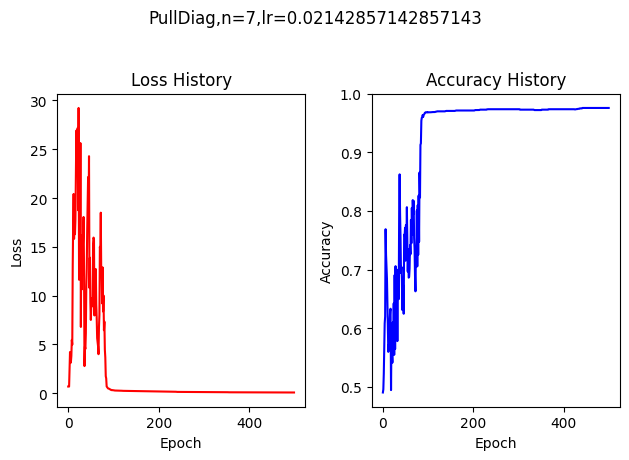

In [43]:
L1,A1=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.15/n)) 

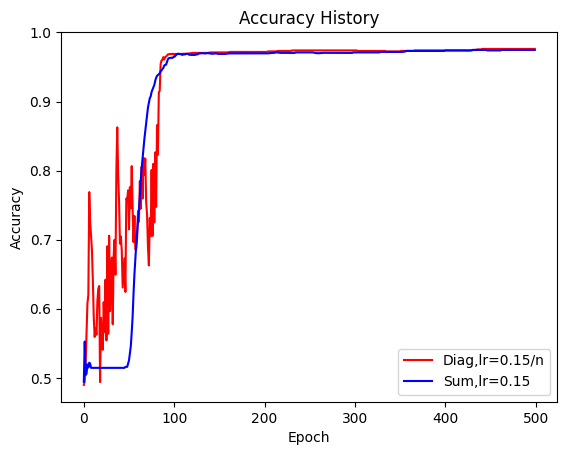

In [49]:
plt.plot(A1,color='r',label='Diag,lr=0.15/n',linestyle='-')
plt.plot(a4,color='b',label='Sum,lr=0.15',linestyle='-')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend() 
plt.show()

<font color=blue>差异不是很明显，因为Diag的metric还不过极端，下面来看一个极端的</font>

In [3]:
n=7
d=784
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=47191).T #92,241,3287,11762,30667,47191，120228
#A=0.99*A+0.01*I
B=get_B(A=A,u=2*n,n=n)
show_row(A)
show_col(B)
epochs=500
_,__=test_row(A=A,epochs=epochs,if_plot=False)
print(_,' ',__)

A的第二大特征值: 0.7165144076688534
A的beta: 0.9085000965510396
A的spectral gap: 0.09149990344896042
A的kappa: 3.875182682187826
S_A是: 136.1677284306381 

B的第二大特征值: 0.7153646111059109
B的beta: 0.9083188815146204
B的spectral gap: 0.09168111848537963
B的kappa: 3.851684901874709
S_B是: 135.54754431928805 

3.2294976348294697   5.613548852223199e+16


Training Progress: 100%|██████████| 500/500 [01:14<00:00,  6.69it/s, accuracy=97.1780028944%, epoch=500, loss=0.1206313968]


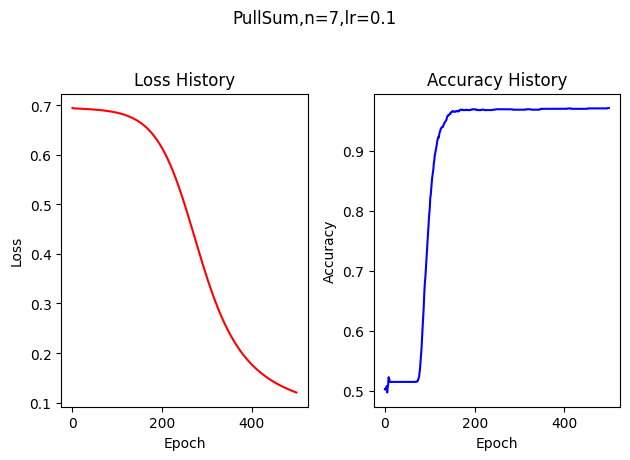

In [4]:
l1,a1=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.1/n))

Training Progress: 100%|██████████| 500/500 [01:13<00:00,  6.85it/s, accuracy=51.4471780029%, epoch=500, loss=49.4932430812]


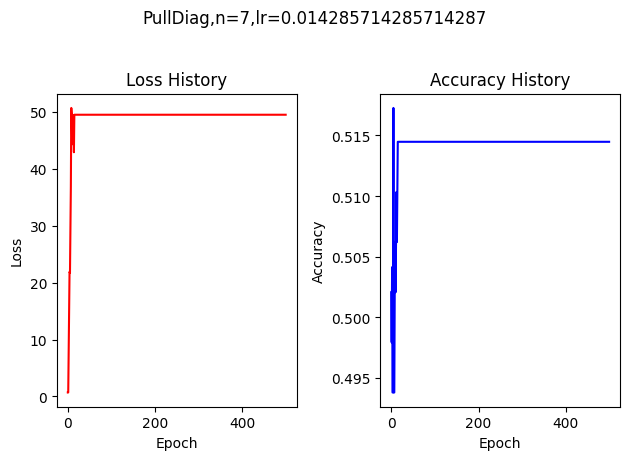

In [5]:
L1,A1=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.1/n)) 

<font color=blue>这里的Diag的metric达到了1e16，我们大概需要1e10就行了</font>

A的第二大特征值: 0.4178593732366237
A的beta: 0.9111907084554896
A的spectral gap: 0.08880929154451045
A的kappa: 4.817451039384905
S_A是: 153.26145163700036 

B的第二大特征值: 0.41894479285904984
B的beta: 0.9099908657133929
B的spectral gap: 0.09000913428660706
B的kappa: 4.909100671079742
S_B是: 152.32635744854952 



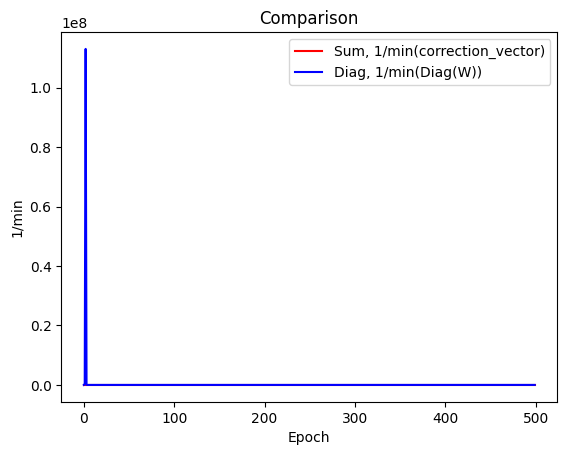

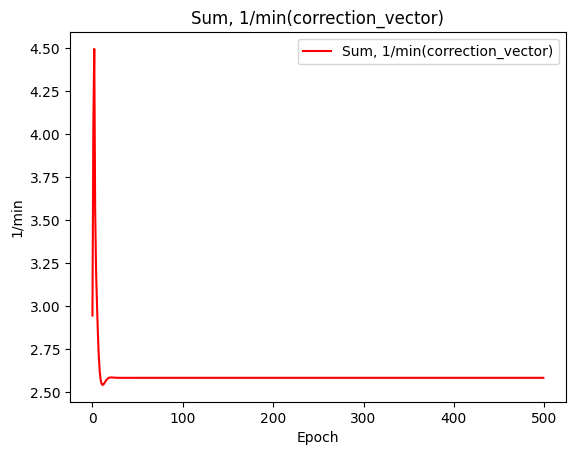

Sum:4.496090
Diag:1.130e+08


In [3]:
n=7
d=784
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=32685).T #92,241,3287,11762,30667,47191，120228,35582,49360,71611，83933,146267,92909,32685,108731
#A=0.95*A+0.05*I
B=get_B(A=A,u=2*n,n=n)
show_row(A)
show_col(B)
epochs=500
a,b=test_row(A=A,epochs=epochs,if_plot=True)
print(f'Sum:{(a):3f}')
print(f'Diag:{(b):.3e}')

In [17]:
index,value=0,10
for i in tqdm(range(150000), desc="Training Progress"):
    A=get_xinmeng_like_matrix(n,seed=i).T
    epochs=50
    _,__=test_row(A=A,epochs=25,if_plot=False)
    if __ > value and _ < 5 and __<1.1*1e8:
        index,value=i,__
print(index,value)

Training Progress: 100%|██████████| 150000/150000 [00:34<00:00, 4401.74it/s]

108731 105700324.65498589


Training Progress: 100%|██████████| 500/500 [01:20<00:00,  6.22it/s, accuracy=97.3227206946%, epoch=500, loss=0.1052488493]


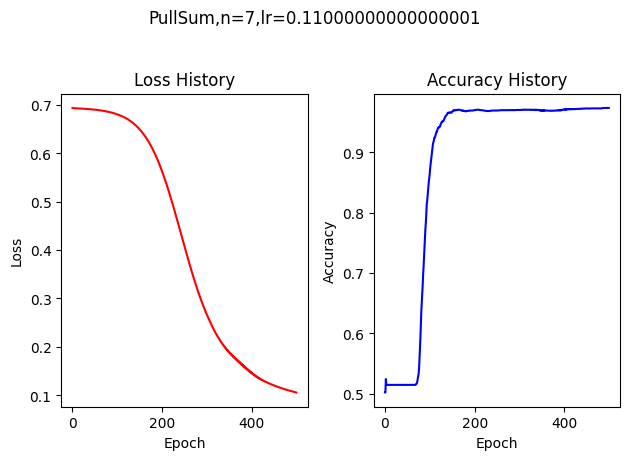

In [6]:
l1,a1=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.11/n))

Training Progress: 100%|██████████| 500/500 [01:14<00:00,  6.74it/s, accuracy=97.3227206946%, epoch=500, loss=0.0964648032]


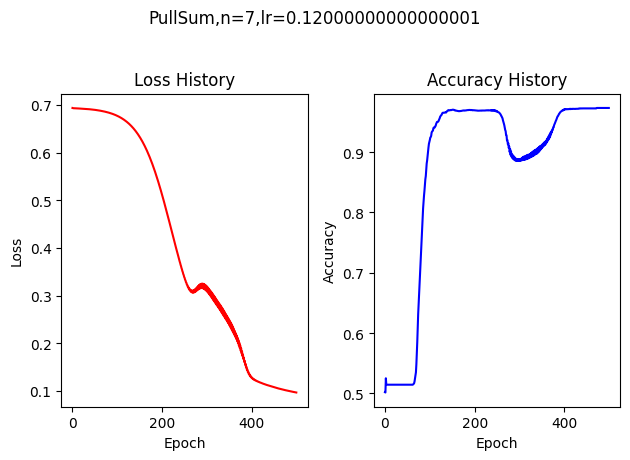

In [7]:
l2,a2=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.12/n))

Training Progress: 100%|██████████| 500/500 [01:11<00:00,  6.95it/s, accuracy=97.1780028944%, epoch=500, loss=0.0723435017]


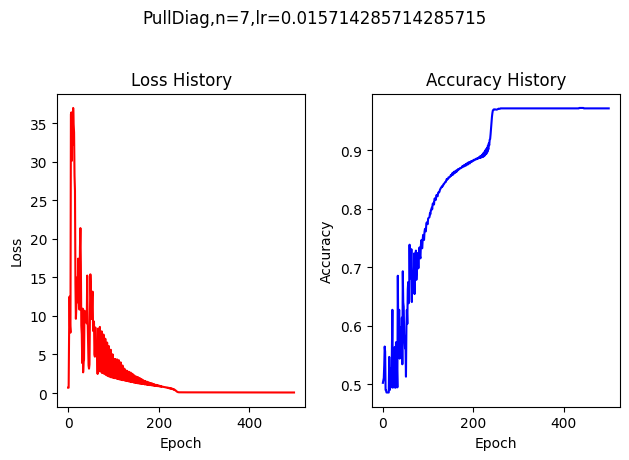

In [8]:
L1,A1=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.11/n)) 

Training Progress: 100%|██████████| 500/500 [01:14<00:00,  6.74it/s, accuracy=97.3950795948%, epoch=500, loss=0.1252301208] 


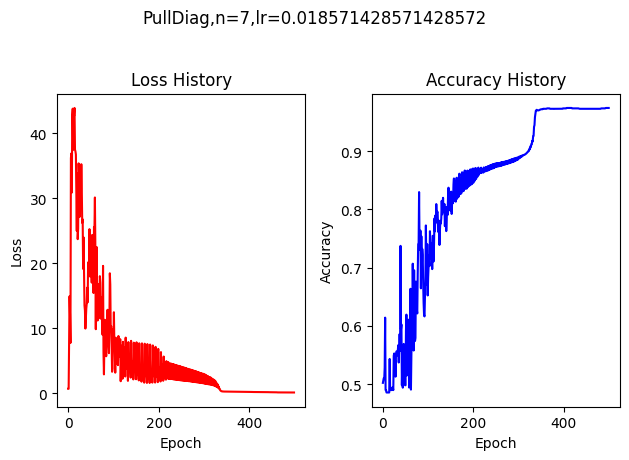

In [9]:
L2,A2=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.13/n)) 

Training Progress: 100%|██████████| 500/500 [01:15<00:00,  6.61it/s, accuracy=48.5528219971%, epoch=500, loss=50.5067569188]


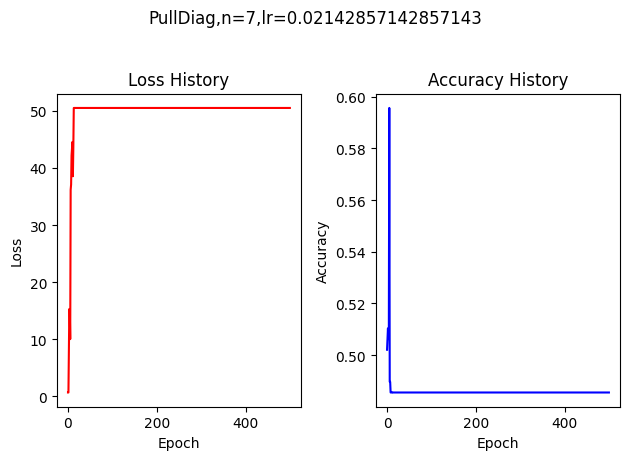

In [10]:
L3,A3=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.15/n)) 

Training Progress: 100%|██████████| 500/500 [01:13<00:00,  6.83it/s, accuracy=97.3227206946%, epoch=500, loss=0.0697891968]


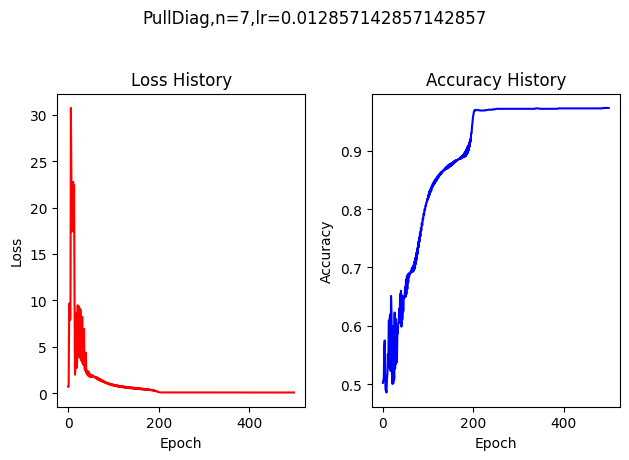

In [11]:
L4,A4=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.09/n))

Training Progress: 100%|██████████| 500/500 [01:12<00:00,  6.87it/s, accuracy=97.3950795948%, epoch=500, loss=0.0822006719]


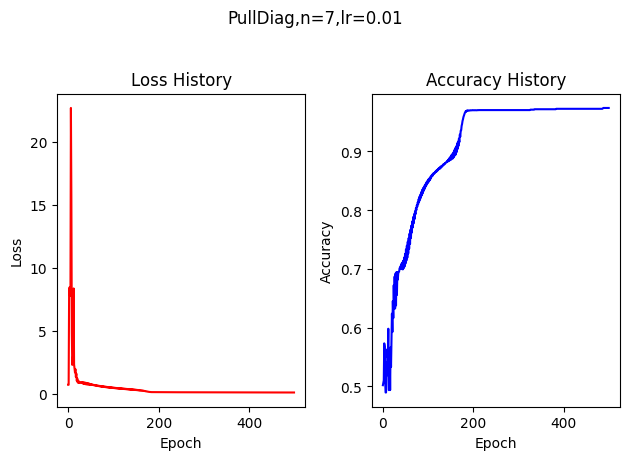

In [12]:
L5,A5=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.07/n))

Training Progress: 100%|██████████| 500/500 [01:22<00:00,  6.05it/s, accuracy=97.1780028944%, epoch=500, loss=0.0951882377]


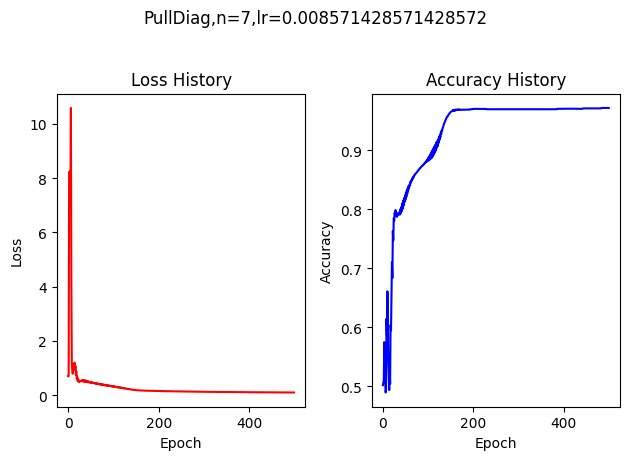

In [22]:
L6,A6=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.06/n))

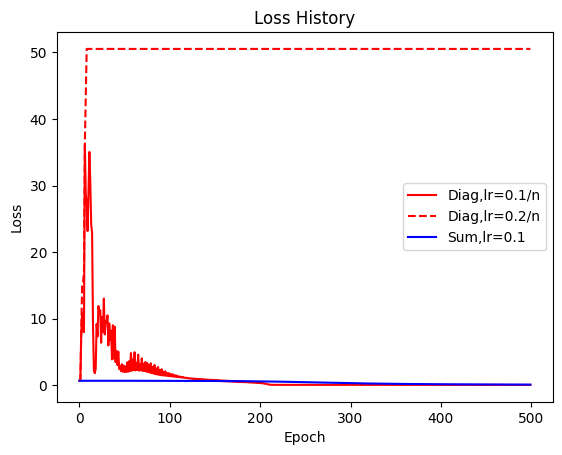

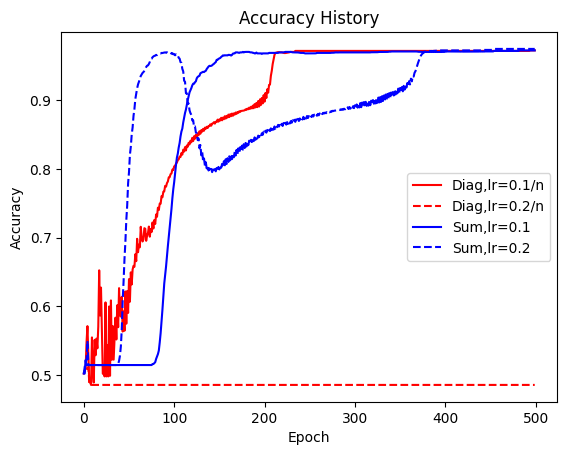

In [33]:
plt.plot(L1,color='r',label='Diag,lr=0.1/n',linestyle='-')
plt.plot(L2,color='r',label='Diag,lr=0.2/n',linestyle='--')
plt.plot(l1,color='b',label='Sum,lr=0.1',linestyle='-')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend() 
plt.show()

plt.plot(A1,color='r',label='Diag,lr=0.1/n',linestyle='-')
plt.plot(A2,color='r',label='Diag,lr=0.2/n',linestyle='--')
plt.plot(a1,color='b',label='Sum,lr=0.1',linestyle='-')
plt.plot(a2,color='b',label='Sum,lr=0.2',linestyle='--')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend() 
plt.show()

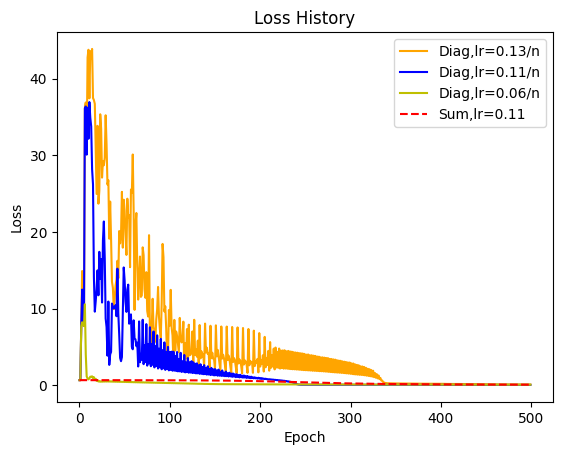

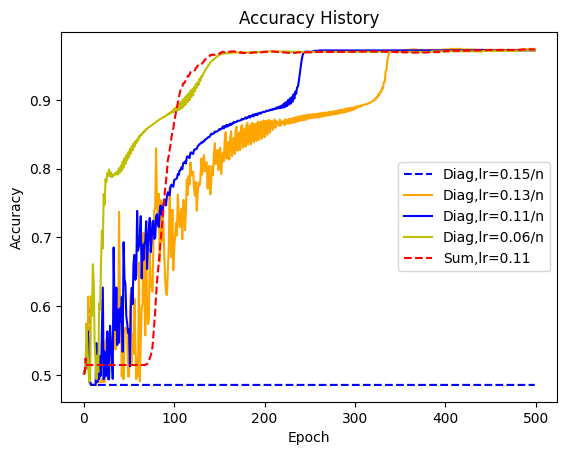

In [42]:
plt.plot(L2,color='orange',label='Diag,lr=0.13/n',linestyle='-')
plt.plot(L1,color='b',label='Diag,lr=0.11/n',linestyle='-')
plt.plot(L6,color='y',label='Diag,lr=0.06/n',linestyle='-')
plt.plot(l1,color='r',label='Sum,lr=0.11',linestyle='--')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend() 
plt.show()
#plt.plot(A5,color='b',label='Diag,lr=0.14/n=0.02',linestyle='-')
plt.plot(A3,color='b',label='Diag,lr=0.15/n',linestyle='--')
plt.plot(A2,color='orange',label='Diag,lr=0.13/n',linestyle='-')
plt.plot(A1,color='b',label='Diag,lr=0.11/n',linestyle='-')
plt.plot(A6,color='y',label='Diag,lr=0.06/n',linestyle='-')
plt.plot(a1,color='r',label='Sum,lr=0.11',linestyle='--')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend() 
plt.show()